[ 0.03212904  0.00213033 -0.00015512 -0.00138619 -0.00220944 -0.00281816
 -0.00329558 -0.00368488 -0.00401125 -0.00429058 -0.00453352 -0.00474756
 -0.0049381  -0.00510921 -0.00526401 -0.00540492 -0.00553388 -0.00565246
 -0.00576193 -0.00586337 -0.00595765 -0.00604552 -0.00612762 -0.0062045
 -0.00627664 -0.00634443 -0.00640824 -0.00646837 -0.00652512 -0.00657871
 -0.00662938 -0.0066773  -0.00672265 -0.0067656  -0.00680627 -0.00684479
 -0.00688127 -0.00691581 -0.00694851 -0.00697945 -0.00700869 -0.00703631
 -0.00706237 -0.00708692 -0.00711    -0.00713167 -0.00715195 -0.00717089
 -0.0071885  -0.00720482 -0.00721986 -0.00723364 -0.00724618 -0.00725747
 -0.00726753 -0.00727635 -0.00728394 -0.00729027 -0.00729535 -0.00729916
 -0.00730168 -0.00730287 -0.00730271 -0.00730117 -0.00729819 -0.00729374
 -0.00728774 -0.00728015 -0.00727087 -0.00725983 -0.00724693 -0.00723206
 -0.00721508 -0.00719585 -0.00717421 -0.00714997 -0.00712289 -0.00709273
 -0.00705918 -0.0070219  -0.00698048 -0.00693442 -0.

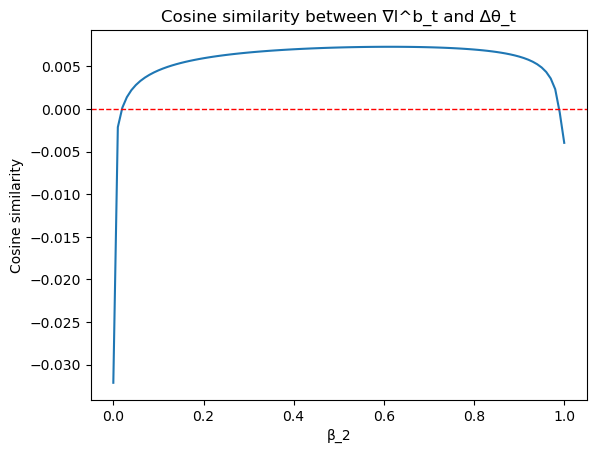

In [280]:
import numpy as np

# Read the CSV file as a NumPy array
array = np.loadtxt('cos_sim_beta2_0p8.csv', delimiter=',')  # Assumes values are separated by commas or newlines

print(array)

import  matplotlib.pyplot as plt

x = list(np.arange(0, 1.01, 0.01))
plt.xlabel('β_2')
plt.ylabel('Cosine similarity')
plt.plot(x, -array)
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1)
plt.title('Cosine similarity between ∇l^b_t and ∆θ_t')
plt.show()


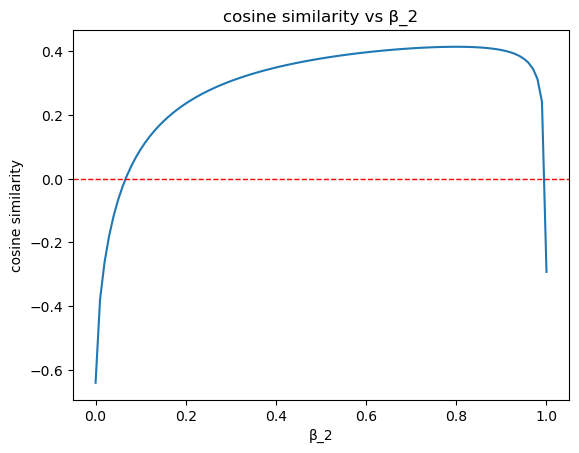

In [275]:
# example in paper
import numpy as np
import  matplotlib.pyplot as plt

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

grad_l_b = np.array([2, 1, 2])  # Grad l^b_t
m_hat = np.array([8, -1, -2])  # m^hat_t
v_prev = np.array([1, 0.0001, 1])  # v_{t - 1}
g_squared = np.array([1, 4, 0.0001])  # g_t squared

cos_sim_list = []
beta_list = np.arange(0, 1.01, 0.01)
trajectory = []
for beta in beta_list:
    delta_x = m_hat / np.sqrt(beta * v_prev + (1 - beta) * g_squared)  # Delta x_t
    trajectory.append(delta_x)
    cos_sim_list.append(cosine_similarity(grad_l_b, delta_x))

plt.xlabel("β_2")
plt.ylabel("cosine similarity")
plt.title("cosine similarity vs β_2")
plt.plot(beta_list, cos_sim_list)
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1)

# plot the trajectory in 2D space

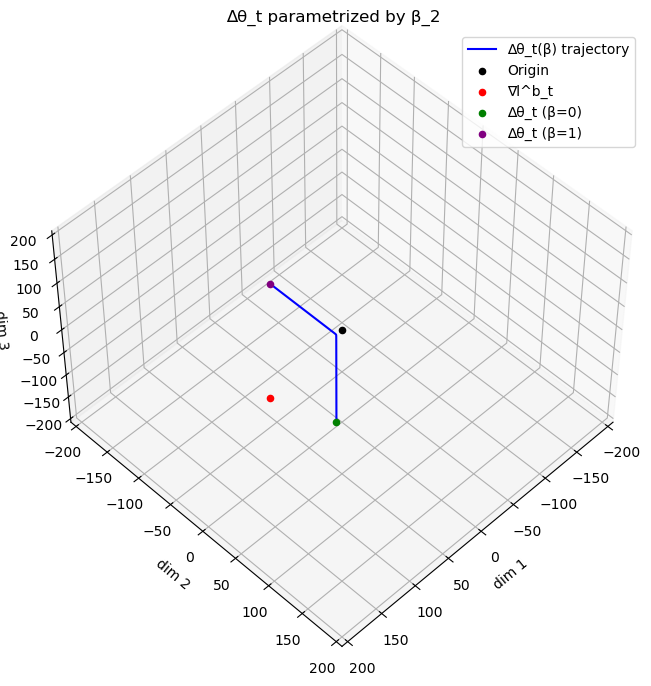

Number of points in trajectory: 101
Start point: [   8.    -0.5 -200. ]
End point: [   8. -100.   -2.]
Gradient vector: [2 1 2]


In [273]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the variables
grad_l_b = np.array([2, 1, 2])  # Grad l^b_t
m_hat = np.array([8, -1, -2])  # m^hat_t
v_prev = np.array([1, 0.0001, 1])  # v_{t - 1}
g_squared = np.array([1, 4, 0.0001])  # g_t squared

# Calculate trajectory points
beta_list = np.arange(0, 1.01, 0.01)
trajectory = []
for beta in beta_list:
    delta_x = m_hat / np.sqrt(beta * v_prev + (1 - beta) * g_squared)
    trajectory.append(delta_x)

# Convert trajectory to numpy array for easier plotting
trajectory = np.array(trajectory)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'b-', 
        label='∆θ_t(β) trajectory')

# Plot origin point
ax.scatter([0], [0], [0], color='black', s=20, label='Origin')
grad_l_b_examplified = grad_l_b * 100
ax.scatter(grad_l_b_examplified[0], grad_l_b_examplified[1], grad_l_b_examplified[2], color='red', s=20, label='∇l^b_t')
#plt.plot([0, grad_l_b_examplified[0]], [0, grad_l_b_examplified[1]], [0, grad_l_b_examplified[2]], color='k', linestyle='--')

# Plot start and end points of trajectory
ax.scatter(trajectory[0, 0], trajectory[0, 1], trajectory[0, 2], color='green', s=20, label='∆θ_t (β=0)')
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], color='purple', s=20, label='∆θ_t (β=1)')

# Add labels and title
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('∆θ_t parametrized by β_2')

# Calculate symmetric limits
max_range = np.max(np.abs(trajectory))
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# Add legend
ax.legend()

# Adjust the view
ax.view_init(elev=20, azim=45)

# Add grid
ax.grid(True)

# Adjust the view angle for better visualization
ax.view_init(elev=50, azim=45)

# Show plot
plt.show()

# Print some statistics about the trajectory
print(f"Number of points in trajectory: {len(trajectory)}")
print(f"Start point: {trajectory[0]}")
print(f"End point: {trajectory[-1]}")
print(f"Gradient vector: {grad_l_b}")